In [75]:
import tensorflow as tf
import datetime
from tensorflow.keras import layers
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras import models
from tensorflow.keras.models import Model 
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
from tensorflow.keras import backend as K
from kerastuner.tuners import Hyperband
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.losses import MeanSquaredError
import os, shutil
#from PIL import Image, ImageDraw, ImageFont, ImageColor
import random 
import pandas as pd
import pydot
from tensorflow.keras.utils import Sequence
from my_classes import DataGenerator, STMImage, DataGeneratorAug

In [76]:
train_dataset_dir ='\\Users\\danie\\Penn_State_REU_Jupyter\\Hexagon ML Project GitHub\\Training_set_7_01' 

df=pd.read_csv(os.path.join(train_dataset_dir,"training_dataframe.csv"))
#df = df.sample(frac=0.001,random_state=5).reset_index(drop=True)

df.shape

(300000, 18)

In [77]:
validation_split_frac=0.2
batch_size=200
array_dim=(32,32,1)

train_partition=df['filename'][:int(df.shape[0]*validation_split_frac)]
val_partition=df['filename'][int(df.shape[0]*validation_split_frac):]
partition={"train":train_partition,'validation':val_partition}

#Creates a dictionary with keys as the data filenames and entries as the labels
label_names=['x_coord','y_coord','neighbor1x','neighbor1y','neighbor2x','neighbor2y','neighbor3x','neighbor3y']
ID_list=df['filename'].values
label_list=df[label_names].values
labels={}
i=0
for ID in ID_list:
    labels[ID]=label_list[i]
    i+=1

training_generator=DataGenerator(partition['train'],labels,shuffle=False,directory=train_dataset_dir,batch_size=batch_size,dim=array_dim)
training_generator_aug=DataGeneratorAug(partition['train'],labels,shuffle=False,directory=train_dataset_dir,batch_size=batch_size,dim=array_dim)

In [81]:
batch=training_generator_aug.__getitem__(1)
batch1=training_generator.__getitem__(1)
exp=batch[0][101]
exp1=batch1[0][101]
print(np.min(exp))
print(np.max(exp))
print(np.min(exp1))
print(np.max(exp1))

-1.8491309278768489
3.0122526044858335
0.04939754811898096
0.2759280473312077


<IPython.core.display.Javascript object>


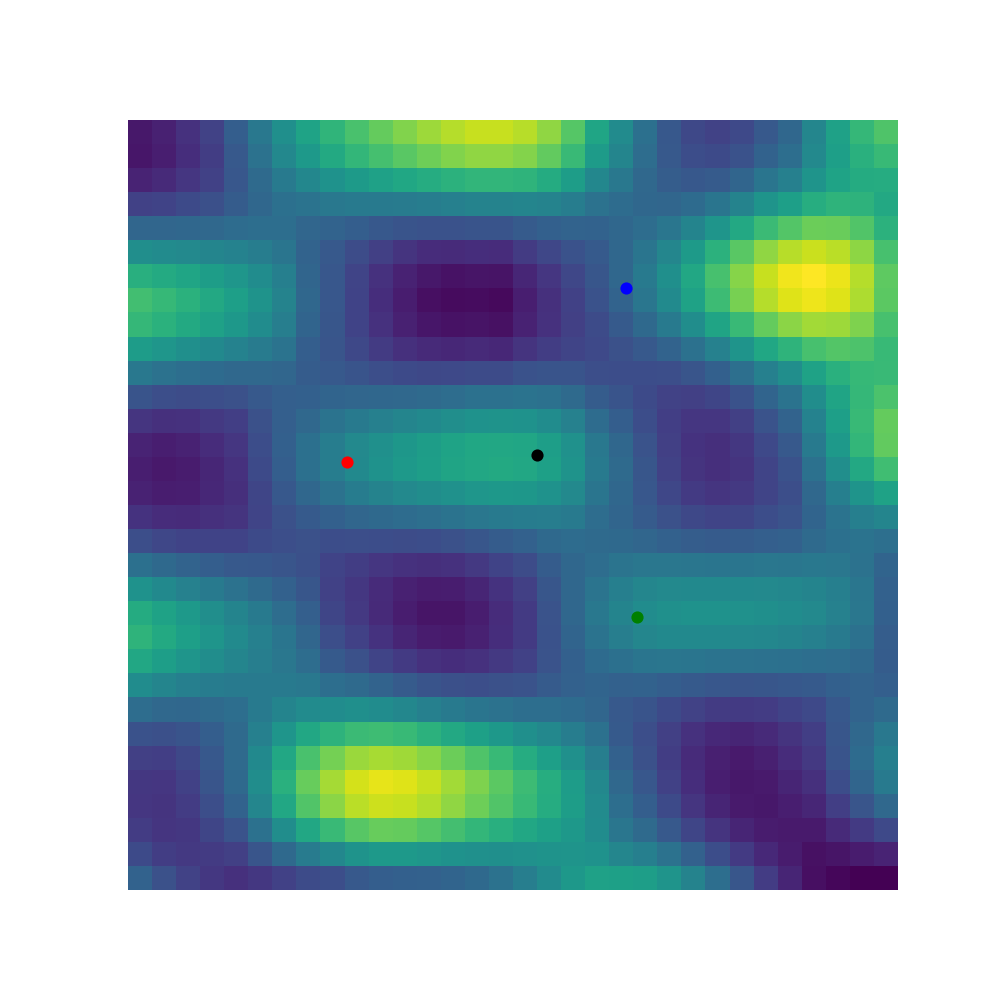

<IPython.core.display.Javascript object>


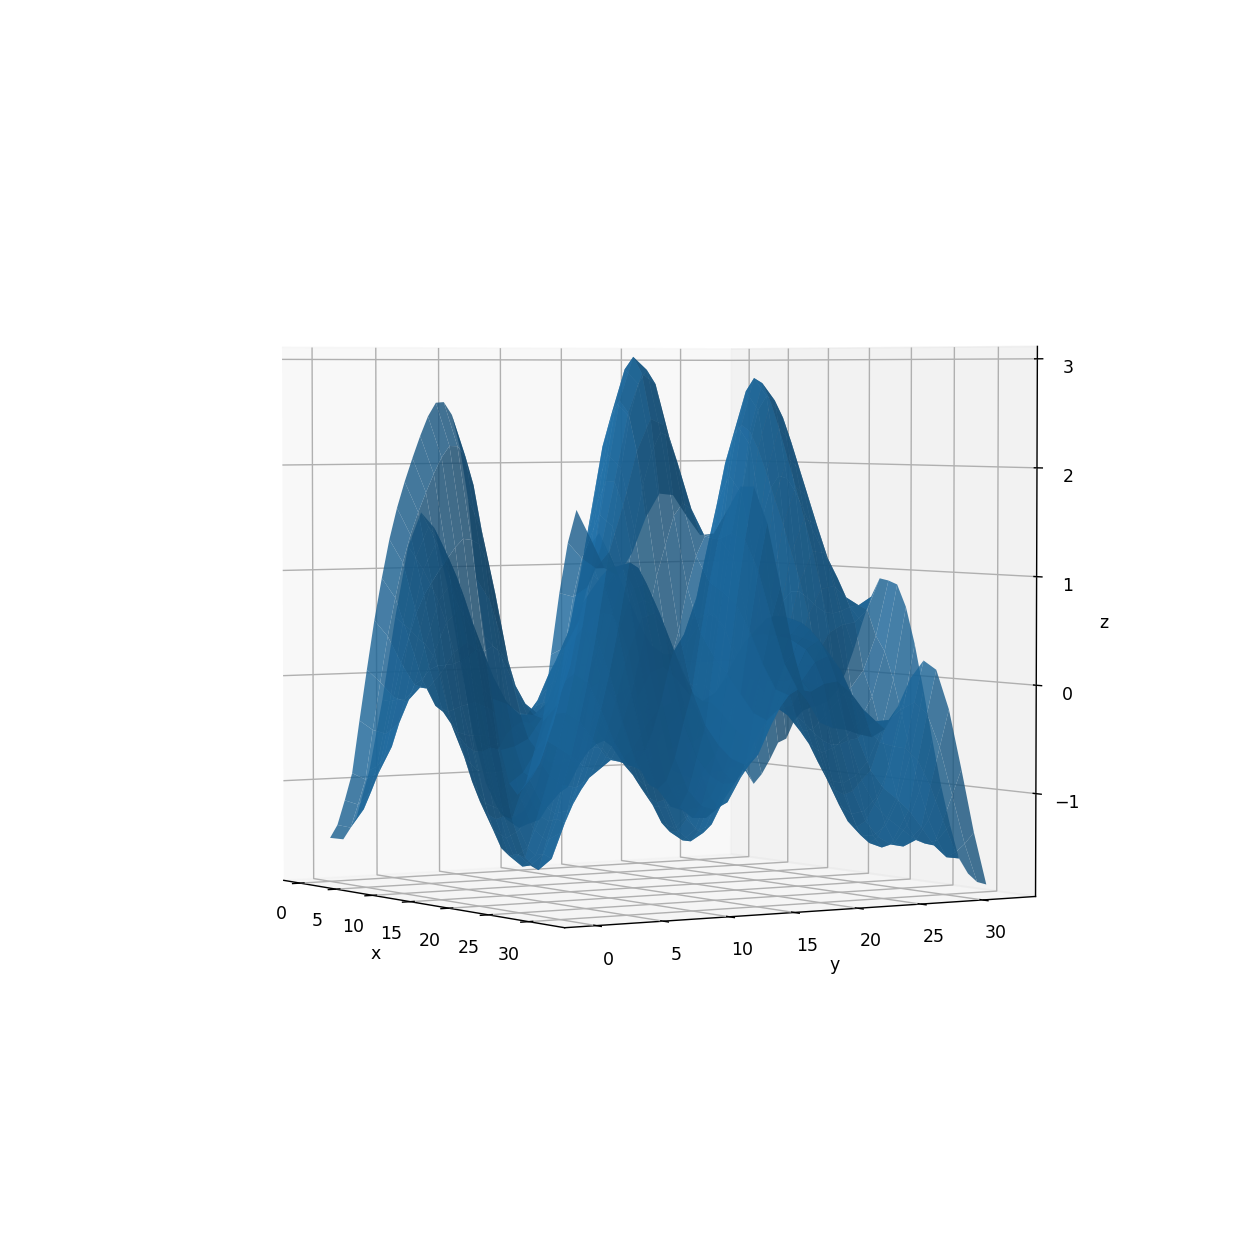

Text(0.5, 0, 'y')

In [82]:
#Method for separting label array into useful data points
def split_label(labels):
    center_atom=np.array([labels[0],labels[1]])*32
    neighborvec1=np.array([labels[2],labels[3]])*32
    neighborvec2=np.array([labels[4],labels[5]])*32
    neighborvec3=np.array([labels[6],labels[7]])*32
    neighbors=[]
    neighbors.append(center_atom+neighborvec1)
    neighbors.append(center_atom+neighborvec2)
    neighbors.append(center_atom+neighborvec3)
    return center_atom , neighbors 

#Methods for coloring in the central atom and labels on the images.
def plot_labels():
    plt.plot(center_atom[0],center_atom[1],'o',color='black')
    plt.plot(neighbors[0][0],neighbors[0][1],'o',color='red')
    plt.plot(neighbors[1][0],neighbors[1][1],'o',color='green')
    plt.plot(neighbors[2][0],neighbors[2][1],'o',color='blue')
    
batch=training_generator_aug.__getitem__(1)  

index=101

center_atom,neighbors=split_label(batch[1][index])


im_data=batch[0][index]
im_data=np.reshape(im_data,(32,32))
fig = plt.figure(figsize = (8, 8))
ax = plt.subplot(1,1,1)
ax.imshow(im_data,cmap='viridis')
ax.axis('off')
plot_labels()



# %matplotlib notebook
z = np.reshape(batch[0][index],(32,32))
ny,nx = z.shape
x = np.linspace(0,nx,nx)
y = np.linspace(0,ny,ny)
xv, yv = np.meshgrid(x,y)
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
height3d=ax.plot_surface(xv,yv,z,linewidth=1,alpha=0.8)
ax.set_zlabel('z')
ax.set_xlabel('x')
ax.set_ylabel('y')